In [1]:
import os
from Bio import SeqIO
from Bio.Seq import Seq

os.chdir('/home/ubuntu/data')

intr_file = 'hg19_intr_clean.fa'
depl_file = 'hg19_depl_clean.fa'

e = 0
intr_seqs = []
depl_seqs = []
for intr, depl in zip(SeqIO.parse(intr_file, 'fasta'), SeqIO.parse(depl_file, 'fasta')):
    
    cutoff = 500
    my_intr_seq = str(intr.seq)[0:cutoff]
    my_depl_seq = str(depl.seq)[0:cutoff]
    
    intr_seqs.append(my_intr_seq)
    #my_intr_reverse_compliment_seq = str(Seq(my_intr_seq).reverse_complement())
    #intr_seqs.append(my_intr_reverse_compliment_seq)
    
    depl_seqs.append(my_depl_seq)
    #my_depl_reverse_compliment_seq = str(Seq(my_depl_seq).reverse_complement())
    #depl_seqs.append(my_depl_reverse_compliment_seq)
    
    e = e + 1
    if e%20000 == 0:
        print('Finished ' + str(e) + ' entries')

Finished 20000 entries
Finished 40000 entries
Finished 60000 entries


In [2]:
def getKmers(sequence, size):
    return [sequence[x:x+size].upper() for x in range(len(sequence) - size + 1)]

In [3]:
kmer = 1

print('Building Neanderthal introgressed sequences')
intr_sentences = []
for i in range(len(intr_seqs)):
    intr_sentences.append(getKmers(intr_seqs[i], kmer))

print('Building Neanderthal depleted sequences')
depl_sentences = []
for i in range(len(depl_seqs)):
    depl_sentences.append(getKmers(depl_seqs[i], kmer))

Building Neanderthal introgressed sequences
Building Neanderthal depleted sequences


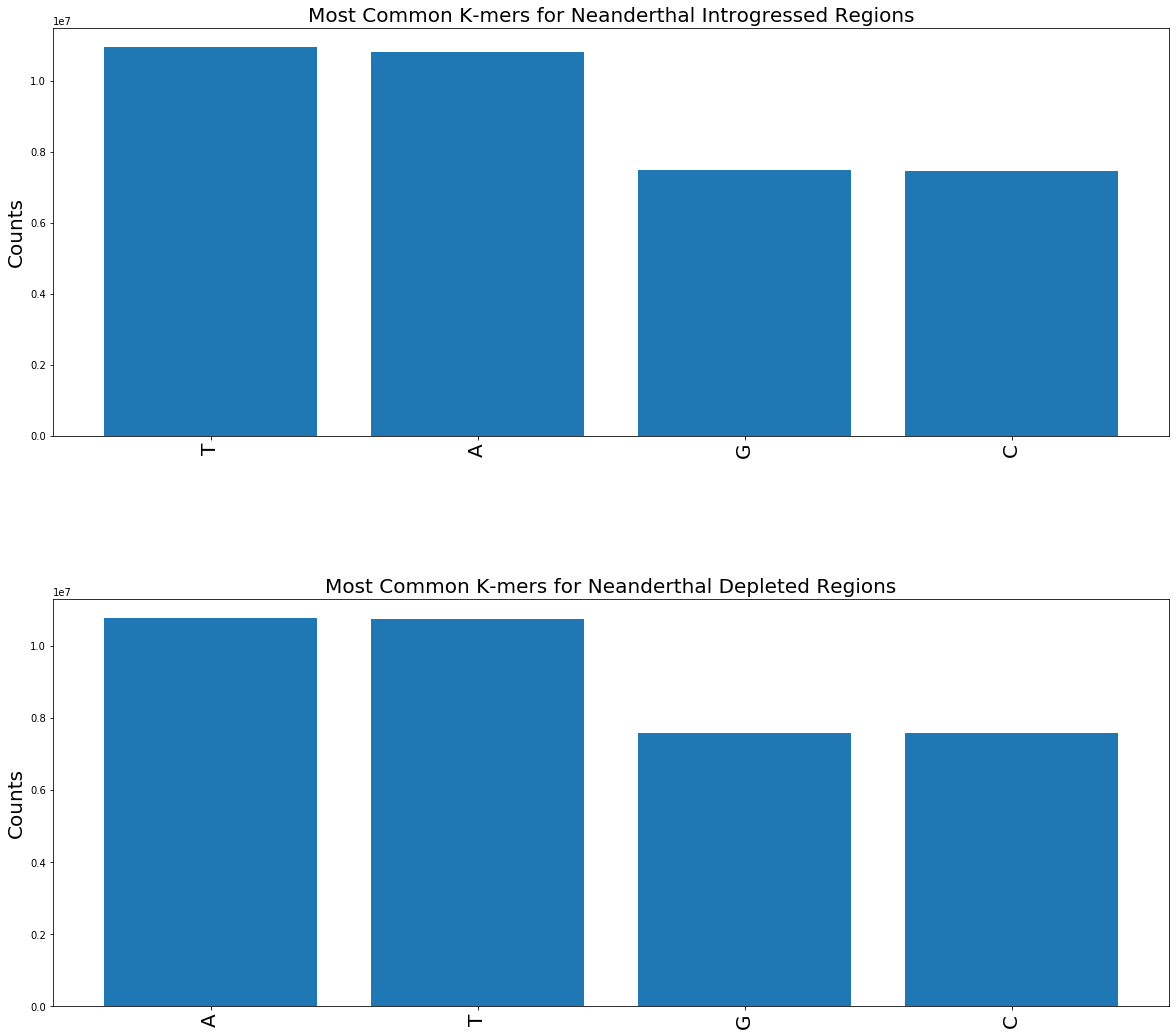

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,18))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

plt.subplot(2, 1, 1)
D_intr = dict(Counter([item for sublist in intr_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_intr)), list(D_intr.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Introgressed Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_intr)), list(D_intr.keys()), fontsize = 20)

D_intr_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))

plt.subplot(2, 1, 2)
D_depl = dict(Counter([item for sublist in depl_sentences for item in sublist]).most_common(20))
plt.bar(range(len(D_depl)), list(D_depl.values()), align='center')
plt.title('Most Common K-mers for Neanderthal Depleted Regions', fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.xticks(rotation = 90)
plt.xticks(range(len(D_depl)), list(D_depl.keys()), fontsize = 20)

D_depl_c=dict(Counter([item for sublist in intr_sentences for item in sublist]))
               
plt.show()

In [11]:
"""print(list(D_intr_c.values()))
print(list(D_intr_c.keys()))

print(list(D_depl.values()))
print(list(D_depl.keys()))"""

'print(list(D_intr_c.values()))\nprint(list(D_intr_c.keys()))\n\nprint(list(D_depl.values()))\nprint(list(D_depl.keys()))'

In [12]:
import pandas as pd
intr_counts = dict(Counter([item for sublist in intr_sentences for item in sublist]))
kmers = list(intr_counts.keys())
counts = list(intr_counts.values())
intr_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
intr_df = intr_df.sort_values(['Count'], ascending = False)
intr_df.head(10)

,Kmer,Count
188,TTTTT,243816
332,AAAAA,204235
145,ATTTT,148726
549,AAAAT,145161
653,TATTT,125705
189,TTTTA,124253
429,TAAAA,120031
736,AAATA,119711
147,TTTCT,119003
384,AGAAA,115151


In [13]:
import pandas as pd
depl_counts = dict(Counter([item for sublist in depl_sentences for item in sublist]))
kmers = list(depl_counts.keys())
counts = list(depl_counts.values())
depl_df = pd.DataFrame({'Kmer': kmers, 'Count': counts})
depl_df = depl_df.sort_values(['Count'], ascending = False)
depl_df.head(10)

,Kmer,Count
652,AAAAA,248644
111,TTTTT,242653
102,AAAAT,145922
110,ATTTT,143546
534,AAATA,120383
475,TAAAA,119870
545,TATTT,119721
243,TTTTA,118676
77,AGAAA,114373
33,TTTCT,113512


In [14]:
merge_df = pd.merge(intr_df, depl_df, on = 'Kmer')
merge_df.columns = ['Kmer','Count_Intr','Count_Depl']
merge_df['Odds_Depl2Intr'] = merge_df['Count_Depl'] / merge_df['Count_Intr']
sorted_merge_df = merge_df.sort_values(['Odds_Depl2Intr'], ascending = False)
sorted_merge_df.head()

,Kmer,Count_Intr,Count_Depl,Odds_Depl2Intr
1015,CCGCG,1996,3237,1.621743
1014,CGCGC,2266,3619,1.597087
863,GCGCC,5870,8698,1.481772
1017,CGGCG,1907,2706,1.418983
830,CGGCC,6872,9678,1.408324


In [15]:
sorted_merge_df['PredictPower'] = abs(sorted_merge_df['Odds_Depl2Intr'] - 1)
sorted_merge_df.head()

,Kmer,Count_Intr,Count_Depl,Odds_Depl2Intr,PredictPower
1015,CCGCG,1996,3237,1.621743,0.621743
1014,CGCGC,2266,3619,1.597087,0.597087
863,GCGCC,5870,8698,1.481772,0.481772
1017,CGGCG,1907,2706,1.418983,0.418983
830,CGGCC,6872,9678,1.408324,0.408324


In [16]:
freq_intr = sorted_merge_df["Count_Intr"]/sum(list(intr_counts.values()))
freq_depl = sorted_merge_df["Count_Depl"]/sum(list(depl_counts.values()))
print(freq_intr.head())
print(freq_depl.head())

1015    0.000055
1014    0.000062
863     0.000161
1017    0.000052
830     0.000189
Name: Count_Intr, dtype: float64


In [18]:
"""import numpy as np
from random import choice

def weightedchoice(items): 
    return choice("".join(x * y for x, y in items))

DNA_intr = ""
DNA_depl = ""

for i in range(500001):
    DNA_intr += weightedchoice([("C", 25), ("G", 25), ("A", 25), ("T", 25)])
    DNA_depl += weightedchoice([("C", 25), ("G", 25), ("A", 25), ("T", 25)])

counter = 0
for n in range(len(DNA_intr)):
    if DNA_intr[n:n+5] == "CCGCG":
        counter = counter +1
        
print(counter)"""

471


In [19]:
freq_sort_intr = sum(sorted_merge_df["Count_Intr"][0:5])/sum(list(intr_counts.values()))

rel_freq = np.array(sorted_merge_df["Count_Intr"][0:5]/sum(sorted_merge_df["Count_Intr"][0:5]))

pos = np.random.randint(0, len(DNA_intr), int(len(DNA_intr)*freq_sort_intr/5))

"""for i in pos:
    tmp = weightedchoice([("CCGCG", int(rel_freq[0]*100)), ("CGCGC", int(rel_freq[1]*100)), 
                                  ("GCGCC", int(rel_freq[2]*100)), ("CGGCG", int(rel_freq[3]*100)), 
                                  ("CGGCC", int(rel_freq[4]*100))])
    DNA_intr[i:i+5] == tmp"""

In [20]:
"""counter1 = 0
for n in range(len(DNA_intr)):
    if DNA_intr[n:n+5] == "CCGCG":
        counter1 = counter +1
        
print(counter1)"""

472


In [21]:
"""def weightedchoice(items): 
    return choice("".join(x * y for x, y in items))

items = [("C", 25), ("G", 25)]
p = "".join(x * y for x, y in items)
print(p)"""

CCCCCCCCCCCCCCCCCCCCCCCCCGGGGGGGGGGGGGGGGGGGGGGGGG


In [52]:
import numpy as np
from random import choice

def weightedchoice(items): 
    return choice("".join(x * y for x, y in items))

DNA_intr = ""
DNA_depl = ""

for i in range(500001):
    DNA_intr += weightedchoice([("C", 1), ("G", 1), ("A", 1), ("T", 1)])
    DNA_depl += weightedchoice([("C", 1), ("G", 1), ("A", 1), ("T", 1)])
    
counter = 0
for n in range(len(DNA_intr)):
    if DNA_intr[n:n+5] == "CCGCG":
        counter += 1

print(counter)


words = ["CCGCG", "CGCGC", "GCGCC", "CGGCG", "CGGCC"]
for n in range(len(DNA_intr)):
    for w in words:
        if DNA_intr[n:n+5] == w:
            print(n, DNA_intr[n:n+5])
            DNA_intr.replace(DNA_intr[n:n+5], "AAAAA", 1) # <----- NON FUNZIONA IL REPLACE
            print(n, DNA_intr[n:n+5])
            
print(DNA_intr)

472
724 CGGCC
724 CGGCC
893 CGGCC
893 CGGCC
1210 CGGCG
1210 CGGCG
1302 GCGCC
1302 GCGCC
1428 CGGCC
1428 CGGCC
1574 CCGCG
1574 CCGCG
1730 GCGCC
1730 GCGCC
1767 CCGCG
1767 CCGCG
1895 CGGCC
1895 CGGCC
2335 CGGCG
2335 CGGCG
2338 CGGCC
2338 CGGCC
3447 CCGCG
3447 CCGCG
3448 CGCGC
3448 CGCGC
3605 CGGCG
3605 CGGCG
3607 GCGCC
3607 GCGCC
5073 CCGCG
5073 CCGCG
5074 CGCGC
5074 CGCGC
5161 CGGCG
5161 CGGCG
5177 CGGCC
5177 CGGCC
5356 GCGCC
5356 GCGCC
5364 CGCGC
5364 CGCGC
6072 CGGCC
6072 CGGCC
6234 CGGCG
6234 CGGCG
6529 CCGCG
6529 CCGCG
6572 CGGCC
6572 CGGCC
7228 CGCGC
7228 CGCGC
7229 GCGCC
7229 GCGCC
7337 CGGCC
7337 CGGCC
7604 CCGCG
7604 CCGCG
7605 CGCGC
7605 CGCGC
7853 CGGCC
7853 CGGCC
7969 GCGCC
7969 GCGCC
8510 GCGCC
8510 GCGCC
8624 GCGCC
8624 GCGCC
8783 CCGCG
8783 CCGCG
8985 CCGCG
8985 CCGCG
8986 CGCGC
8986 CGCGC
9236 CGCGC
9236 CGCGC
9237 GCGCC
9237 GCGCC
10410 CGGCC
10410 CGGCC
10634 GCGCC
10634 GCGCC
10703 CGGCG
10703 CGGCG
11584 CGGCG
11584 CGGCG
11632 GCGCC
11632 GCGCC
11859 CGCGC
11859 CGCG

140284 CGGCC
140592 CGCGC
140592 CGCGC
140593 GCGCC
140593 GCGCC
140674 CGGCG
140674 CGGCG
140721 CCGCG
140721 CCGCG
140722 CGCGC
140722 CGCGC
140724 CGCGC
140724 CGCGC
140726 CGCGC
140726 CGCGC
140727 GCGCC
140727 GCGCC
141037 GCGCC
141037 GCGCC
141153 CCGCG
141153 CCGCG
141291 CGGCC
141291 CGGCC
141419 CGCGC
141419 CGCGC
141518 GCGCC
141518 GCGCC
141597 GCGCC
141597 GCGCC
141657 CGCGC
141657 CGCGC
141686 CCGCG
141686 CCGCG
141796 CGGCC
141796 CGGCC
141840 GCGCC
141840 GCGCC
142149 CCGCG
142149 CCGCG
142152 CGGCG
142152 CGGCG
142155 CGGCG
142155 CGGCG
142333 CGGCC
142333 CGGCC
142574 CGGCG
142574 CGGCG
142686 CCGCG
142686 CCGCG
143828 CGCGC
143828 CGCGC
143864 CCGCG
143864 CCGCG
143865 CGCGC
143865 CGCGC
143866 GCGCC
143866 GCGCC
143888 GCGCC
143888 GCGCC
143984 CGGCC
143984 CGGCC
144035 GCGCC
144035 GCGCC
144120 GCGCC
144120 GCGCC
144339 CGCGC
144339 CGCGC
144589 CCGCG
144589 CCGCG
144590 CGCGC
144590 CGCGC
145034 CGCGC
145034 CGCGC
145762 CGGCC
145762 CGGCC
145879 CGCGC
145879 CGCGC

214283 CGCGC
214283 CGCGC
214295 CGCGC
214295 CGCGC
214535 CGGCG
214535 CGGCG
214561 CGCGC
214561 CGCGC
214663 GCGCC
214663 GCGCC
214678 CGCGC
214678 CGCGC
214921 GCGCC
214921 GCGCC
215323 GCGCC
215323 GCGCC
215573 CGGCG
215573 CGGCG
215631 GCGCC
215631 GCGCC
215635 CGGCG
215635 CGGCG
215716 CGGCG
215716 CGGCG
215779 CGGCG
215779 CGGCG
216127 CGGCG
216127 CGGCG
216782 CGGCG
216782 CGGCG
217016 CGGCC
217016 CGGCC
217221 GCGCC
217221 GCGCC
217334 CGGCC
217334 CGGCC
217580 GCGCC
217580 GCGCC
217673 CGGCG
217673 CGGCG
217700 CCGCG
217700 CCGCG
217701 CGCGC
217701 CGCGC
217702 GCGCC
217702 GCGCC
217876 CCGCG
217876 CCGCG
217877 CGCGC
217877 CGCGC
219396 CGGCC
219396 CGGCC
219654 CGGCG
219654 CGGCG
219657 CGGCC
219657 CGGCC
219728 CCGCG
219728 CCGCG
219729 CGCGC
219729 CGCGC
219787 CCGCG
219787 CCGCG
220010 CGGCC
220010 CGGCC
220116 CGCGC
220116 CGCGC
220429 CGGCC
220429 CGGCC
220709 GCGCC
220709 GCGCC
220783 CCGCG
220783 CCGCG
220893 CCGCG
220893 CCGCG
221172 CGGCC
221172 CGGCC
221277 CCGCG

292617 CGGCG
292617 CGGCG
292624 CCGCG
292624 CCGCG
293145 GCGCC
293145 GCGCC
293379 CGCGC
293379 CGCGC
293380 GCGCC
293380 GCGCC
293585 CCGCG
293585 CCGCG
293627 CGGCG
293627 CGGCG
293951 CGGCG
293951 CGGCG
294228 GCGCC
294228 GCGCC
295031 CCGCG
295031 CCGCG
295214 CCGCG
295214 CCGCG
295895 CGGCG
295895 CGGCG
295985 CGGCC
295985 CGGCC
296356 GCGCC
296356 GCGCC
296394 CGGCG
296394 CGGCG
297025 CGGCG
297025 CGGCG
297231 GCGCC
297231 GCGCC
297439 CGGCG
297439 CGGCG
297699 CGGCC
297699 CGGCC
297836 CCGCG
297836 CCGCG
297886 CGGCG
297886 CGGCG
298202 CGCGC
298202 CGCGC
298423 CGGCC
298423 CGGCC
298499 CGGCC
298499 CGGCC
298561 CCGCG
298561 CCGCG
298562 CGCGC
298562 CGCGC
299084 CGGCG
299084 CGGCG
299397 CGCGC
299397 CGCGC
299398 GCGCC
299398 GCGCC
299683 CCGCG
299683 CCGCG
299684 CGCGC
299684 CGCGC
300174 CGGCC
300174 CGGCC
300259 CCGCG
300259 CCGCG
300282 GCGCC
300282 GCGCC
300413 CGCGC
300413 CGCGC
300553 CGGCG
300553 CGGCG
300917 CGCGC
300917 CGCGC
301096 CGGCC
301096 CGGCC
301119 CGGCC

369937 CGCGC
369937 CGCGC
369938 GCGCC
369938 GCGCC
370398 CGGCG
370398 CGGCG
370499 CCGCG
370499 CCGCG
370776 CCGCG
370776 CCGCG
370928 CGGCC
370928 CGGCC
371227 GCGCC
371227 GCGCC
371321 CGGCG
371321 CGGCG
371428 CGCGC
371428 CGCGC
372197 GCGCC
372197 GCGCC
372937 CGGCG
372937 CGGCG
373158 CGCGC
373158 CGCGC
373411 CGGCG
373411 CGGCG
373414 CGCGC
373414 CGCGC
373552 CGGCC
373552 CGGCC
373610 CGGCC
373610 CGGCC
373672 CGGCC
373672 CGGCC
374112 CGGCG
374112 CGGCG
374219 CGGCC
374219 CGGCC
374549 CGGCC
374549 CGGCC
374773 CGCGC
374773 CGCGC
374775 CGCGC
374775 CGCGC
374823 CGGCG
374823 CGGCG
374844 CCGCG
374844 CCGCG
375862 CGGCG
375862 CGGCG
376001 CGGCG
376001 CGGCG
376246 CCGCG
376246 CCGCG
376296 GCGCC
376296 GCGCC
376572 CCGCG
376572 CCGCG
376573 CGCGC
376573 CGCGC
376574 GCGCC
376574 GCGCC
376581 CGCGC
376581 CGCGC
376582 GCGCC
376582 GCGCC
376663 CCGCG
376663 CCGCG
377160 GCGCC
377160 GCGCC
377536 GCGCC
377536 GCGCC
377619 CCGCG
377619 CCGCG
377620 CGCGC
377620 CGCGC
377670 CCGCG

446068 CCGCG
446068 CCGCG
446071 CGGCG
446071 CGGCG
446078 CCGCG
446078 CCGCG
446193 CCGCG
446193 CCGCG
446194 CGCGC
446194 CGCGC
446539 CCGCG
446539 CCGCG
447545 CCGCG
447545 CCGCG
447736 CGGCG
447736 CGGCG
447790 GCGCC
447790 GCGCC
448132 CCGCG
448132 CCGCG
448211 CCGCG
448211 CCGCG
448422 CGGCG
448422 CGGCG
448496 CGGCG
448496 CGGCG
448649 CGGCG
448649 CGGCG
448736 CGGCG
448736 CGGCG
449051 CGCGC
449051 CGCGC
449062 CCGCG
449062 CCGCG
449104 CGGCG
449104 CGGCG
450821 CGGCC
450821 CGGCC
451174 CCGCG
451174 CCGCG
451188 GCGCC
451188 GCGCC
451256 CGCGC
451256 CGCGC
451749 CGGCC
451749 CGGCC
452265 CGGCC
452265 CGGCC
452465 CCGCG
452465 CCGCG
453022 CGCGC
453022 CGCGC
453023 GCGCC
453023 GCGCC
453208 CGCGC
453208 CGCGC
453428 CGGCC
453428 CGGCC
453754 GCGCC
453754 GCGCC
453928 CGCGC
453928 CGCGC
454412 CGGCC
454412 CGGCC
454665 GCGCC
454665 GCGCC
455071 CGGCC
455071 CGGCC
455511 CGCGC
455511 CGCGC
455512 GCGCC
455512 GCGCC
455652 GCGCC
455652 GCGCC
455968 CGGCC
455968 CGGCC
456734 CGGCG

In [45]:
print(DNA_intr[1:6])

TAGCG


In [41]:
counter = 0
for n in range(len(DNA_intr)):
    if DNA_intr[n:n+5] == "CCGCG":
        counter += 1

print(counter)

502


In [ ]:
freq_sort_intr = sum(sorted_merge_df["Count_Intr"][0:5])/sum(list(intr_counts.values()))

rel_freq = np.array(sorted_merge_df["Count_Intr"][0:5]/sum(sorted_merge_df["Count_Intr"][0:5]))

pos = np.random.randint(0, len(DNA_intr), int(len(DNA_intr)*freq_sort_intr/5))

for i in pos:
    tmp = weightedchoice([("CCGCG", int(rel_freq[0]*100)), ("CGCGC", int(rel_freq[1]*100)), 
                                  ("GCGCC", int(rel_freq[2]*100)), ("CGGCG", int(rel_freq[3]*100)), 
                                  ("CGGCC", int(rel_freq[4]*100))])
    DNA_intr[i:i+5] == tmp

In [ ]:
for i in range(500001):
    DNA_intr += weightedchoice([("C", 1), ("G", 1), ("A", 1), ("T", 1)])
    DNA_depl += weightedchoice([("C", 1), ("G", 1), ("A", 1), ("T", 1)])